<h1 style="Comic Sans MS; text-align: center; color: #FFC300">Data Processing Project: EDA analysis of Airbnb datase</h1>
<h3 id="step1" style="font-family: Comic Sans MS; color: #68FF33">1. Problem statement and data collection</h3>
<p style="color: pink">Using a Decision Tree algorithm we have to predict based on diagnostic measures whether or not a patient has diabetes. The dataset originally comes from the National Institute of Diabetes and Digestive and Kidney Diseases.</p>
<ul style="color: pink">
    <li>set a target variable (health-related) to conduct the analysis. In this case we select: <em><b>Outcome</b></em></li>
    <li>perform EDA so we keep the variables that are strictly necessary and eliminate those that are not relevant or do not provide information.</li>
    <li>build, train and optimize a model using DecisionTreeClassifier a metrics for evaluating it.</li>
</ul>

In [1]:
import pandas as pd

total_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<h3 id="step2" style="font-family: Comic Sans MS; color: #68FF33">2. Exploration and data cleaning</h3>

In [2]:
total_data.shape

(768, 9)

In [3]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Eliminate duplicates
total_data = total_data.drop_duplicates().reset_index(drop=True)
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
total_data.shape

(768, 9)

In [6]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


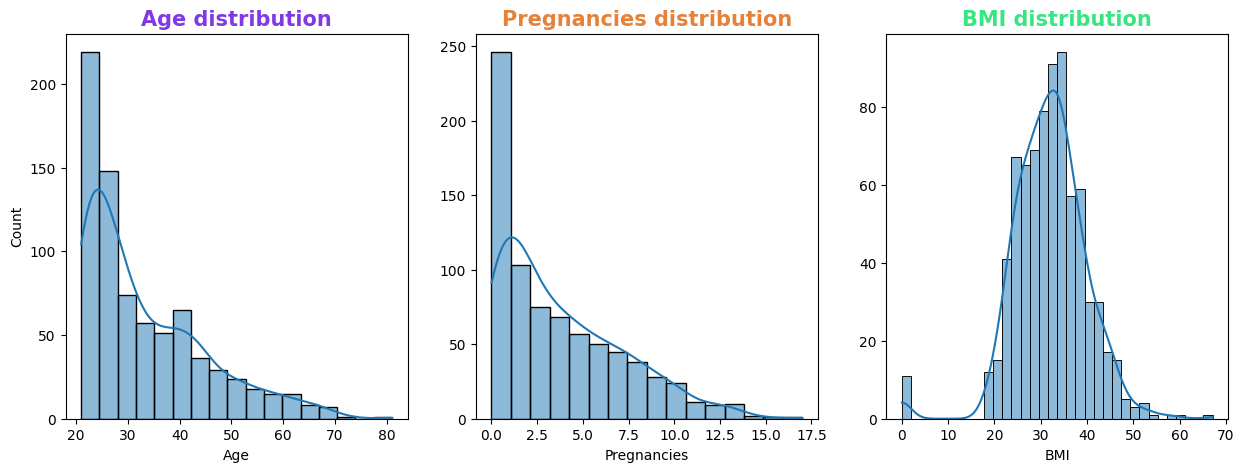

In [21]:
# Display subplots for 'Age', 'Pregnancies' and 'BMI' 
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(total_data['Age'], kde=True, ax=axs[0])
axs[0].set_title('Age distribution', fontsize=15, fontweight='bold', color="#8139E5")

sns.histplot(total_data['Pregnancies'], kde=True, ax=axs[1]).set(ylabel=None)
axs[1].set_title('Pregnancies distribution', fontsize=15, fontweight='bold', color="#E58139")

sns.histplot(total_data['BMI'], kde=True, ax=axs[2]).set(ylabel=None)
axs[2].set_title('BMI distribution', fontsize=15, fontweight='bold', color="#39E581")
plt.show()

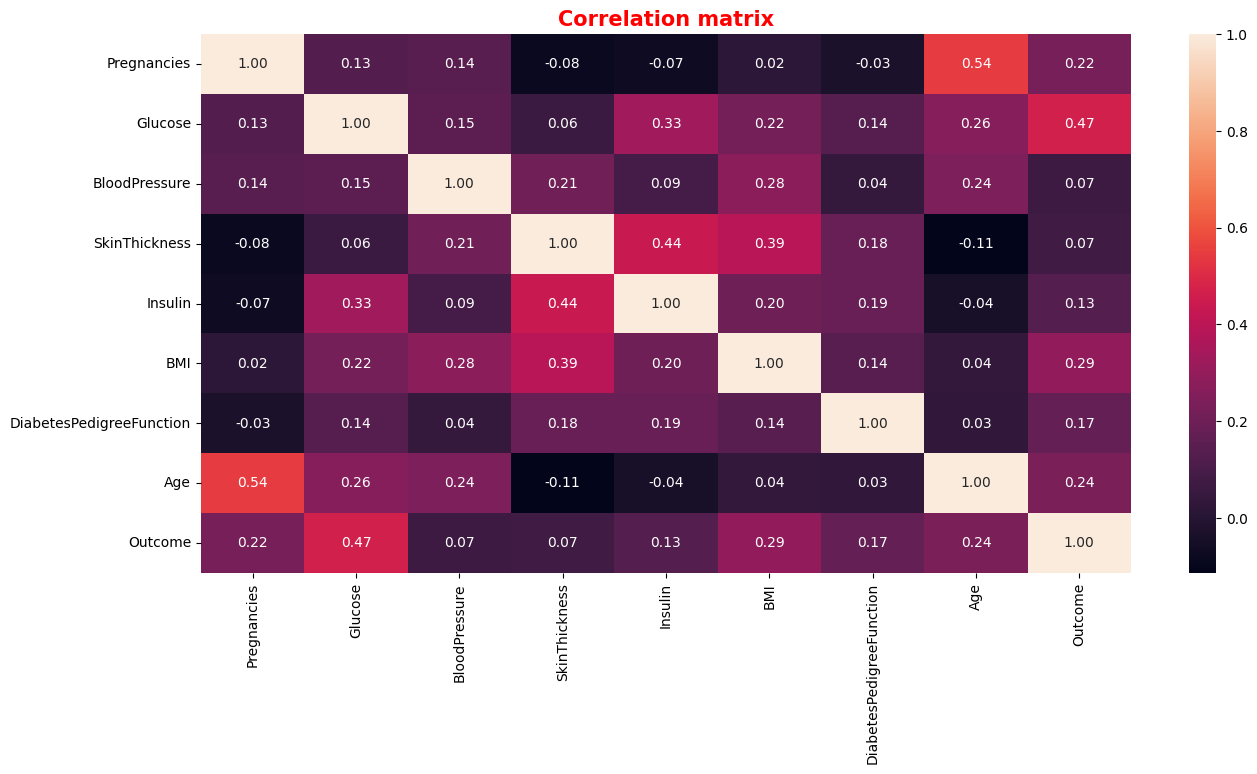

In [25]:
# Correlation analysis
fig, axs = plt.subplots(figsize=(15, 7))
sns.heatmap(total_data.corr(), annot=True, fmt='.2f')
plt.title('Correlation matrix', fontsize=15, fontweight='bold', color="red")
#plt.tight_layout()
plt.show()

<h3 id="step3" style="font-family: Comic Sans MS; color: #68FF33">3. Feature engineering</h3>
<p style="color: pink">Now we will use the train set to train the model, while the test set will be used to evaluate the effectiveness of the model. In addition, the predictor variables do not need to be normalized, since decision trees are not affected by the scale of the data because of the way they work: they make decisions based on certain feature thresholds, regardless of their scale.
</p>
<b><span style="color: red">Feature selection</span></b>

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

# Split the data into features and target
X = total_data.drop(columns='Outcome')
y = total_data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select the best features
selection_model = SelectKBest(k=7) # Select the 7 best features
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()] # Get the selected features, returns a boolean mask of the features selected, used to get the column names from the original dataframe.
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=selected_columns) # Transform the original dataframe into a new dataframe with the selected features
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=selected_columns) 

X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0


In [27]:
X_test_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,98.0,58.0,190.0,34.0,0.430,43.0
1,2.0,112.0,75.0,0.0,35.7,0.148,21.0
2,2.0,108.0,64.0,0.0,30.8,0.158,21.0
3,8.0,107.0,80.0,0.0,24.6,0.856,34.0
4,7.0,136.0,90.0,0.0,29.9,0.210,50.0


In [28]:
X_train_sel['Outcome'] = y_train.values
X_test_sel['Outcome'] = y_test.values
X_train_sel.to_csv('C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/Decision-Tree-project/data/processed/clean_train.csv', index=False)
X_test_sel.to_csv('C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/Decision-Tree-project/data/processed/clean_test.csv', index=False)

<p style="color: pink">We add a new column named 'Outcome' to the <b><em>X_train_sel</em></b> and <b><em>X_test_sel</em></b> which are taken from <b><em>y_train</em></b> and <b><em>y_test</em></b> respectively due to those contain the target values.</p>

<h3 id="step4" style="font-family: Comic Sans MS; color: #68FF33">4. Decision Tree model</h3>
<b><p style="color: red">Reading the processed dataset and plotting features</p></b>

In [29]:
train_data = pd.read_csv('C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/Decision-Tree-project/data/processed/clean_train.csv')
test_data = pd.read_csv('C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/Decision-Tree-project/data/processed/clean_test.csv')
train_data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0,0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0,1
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0,0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0,0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0,1


<p style="color: pink">One way to visualize the relationship of variables to the target is by using the <b><em>parallel_coordinates</em></b>. It is a data visualization technique used to plot multivariate numerical variables:</p>

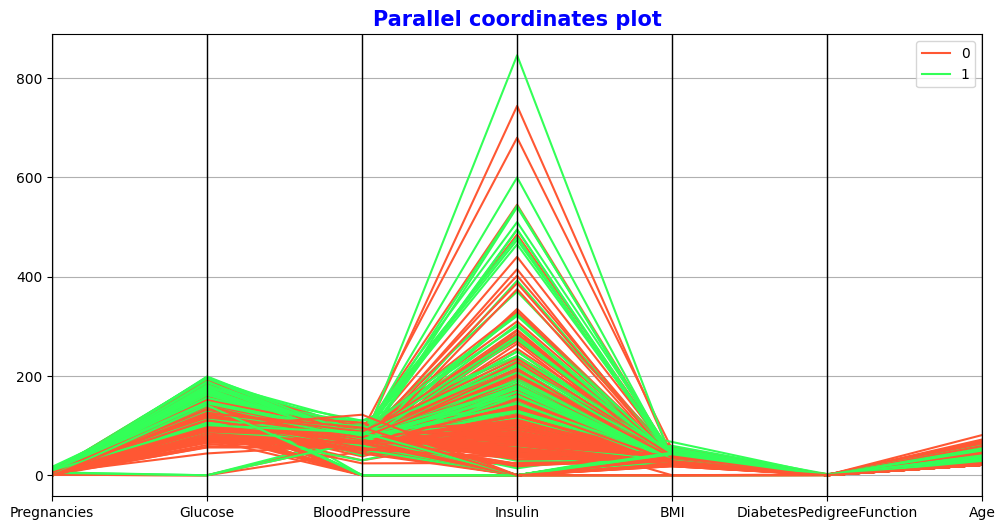

In [31]:
plt.figure(figsize=(12, 6))
pd.plotting.parallel_coordinates(train_data, 'Outcome', color=('#FF5733', '#33FF57'))
plt.title('Parallel coordinates plot', fontsize=15, fontweight='bold', color="blue")
plt.show()

<b><p style="color: red">Initialization and training of the model</p></b>

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Split the data into features and target
X_train = train_data.drop(columns='Outcome')
y_train = train_data['Outcome']
X_test = test_data.drop(columns='Outcome')
y_test = test_data['Outcome']

# Create the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

<p style="color: pink">Once the model has been trained correctly, we can visualize the tree with the same library. This visualization composes all the steps that the model has followed until the construction of the tree. Moreover, it is done in levels and from left to right:</p>

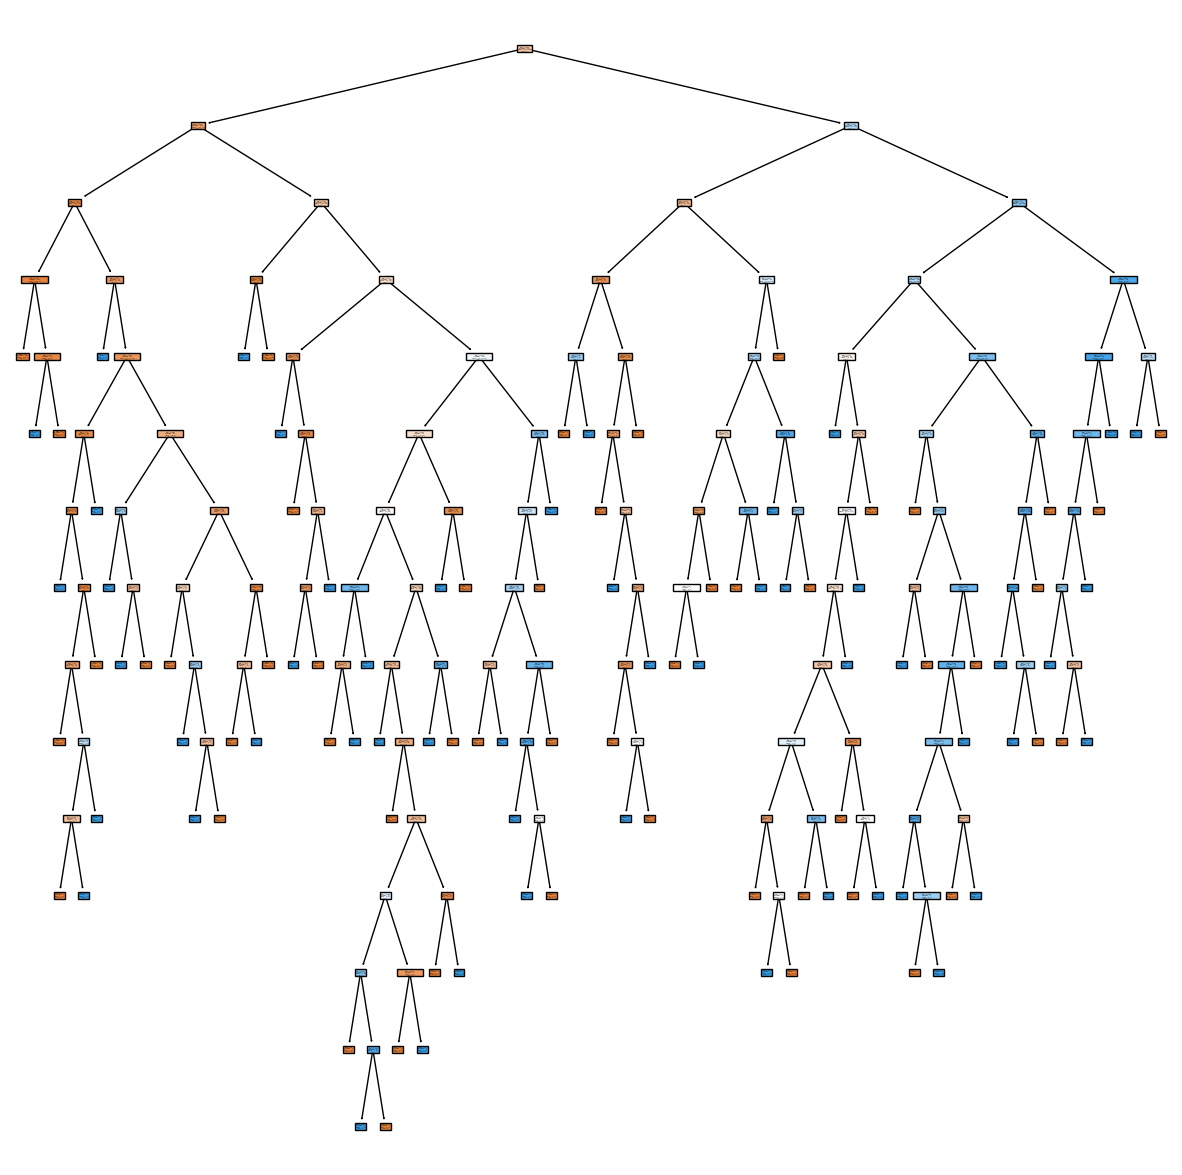

In [34]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))
tree.plot_tree(model,
               feature_names=list(X_train.columns), 
               class_names=['0', '1', '2'],
               filled=True)

plt.show()
""" 
The tree.plot_tree function is used to create a visual representation of the decision tree model. The function receives the following parameters:
model: The decision tree model
feature_names: A list with the names of the features (in this case, the input features)
class_names: A list with the names of the classes (in this case, the target classes)
filled: A boolean value that indicates if the nodes are filled with colors or not
"""

In [35]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

<p style="color: pink">There are a large number of metrics to measure the effectiveness of a model in predicting, including <b><em>accuracy</b></em>, which is the fraction of predictions that the model made correctly.</p>

In [36]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7597402597402597

<h3 id="step5" style="font-family: Comic Sans MS; color: #68FF33">5. Model optimization</h3>

In [38]:
from sklearn.model_selection import GridSearchCV

hyperparameters = {'criterion': ['gini', 'entropy'], # The criterion to be used to split the data (gini or entropy)
                     'max_depth': [None, 5, 10, 20], # The maximum depth of the tree 
                     'min_samples_split': [2, 5, 10], # The minimum number of samples required to split an internal node
                     'min_samples_leaf': [1, 2, 4]} # The minimum number of samples required to be at a leaf node

grid = GridSearchCV(model, hyperparameters, scoring='accuracy', cv=10) # Create the grid search model with the model, hyperparameters, scoring method and cross-validation
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [39]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)
print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [40]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4, min_samples_split=2, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=42)

In [42]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7727272727272727

<div class="alert alert-block alert-success">
<b>Result:</b> After employing GridSearchCV to obtain optimal hyperparameters for model optimization, we observe a notable 2% improvement in accuracy compared to the previous score.</div>

In [43]:
from pickle import dump
dump(model, open('C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/Decision-Tree-project/models/decision_tree_model.pkl', 'wb'))